In [3]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
data=[[1,2],[-0.5,6],[0,10],[1,18]]

In [4]:
data=pd.DataFrame(data)

In [5]:
scaler=MinMaxScaler()

In [6]:
result=scaler.fit_transform(data)

In [7]:
result

array([[1.        , 0.        ],
       [0.        , 0.25      ],
       [0.33333333, 0.5       ],
       [1.        , 1.        ]])

In [8]:
#归一化结果逆转
data=scaler.inverse_transform(result)

In [9]:
data

array([[ 1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [10]:
#指定归一化范围
scaler=MinMaxScaler(feature_range=[5,10])
result=scaler.fit_transform(data)

In [11]:
result

array([[10.        ,  5.        ],
       [ 5.        ,  6.25      ],
       [ 6.66666667,  7.5       ],
       [10.        , 10.        ]])

In [12]:
#特征非常多时，fit会报错，数据量太大计算不了，可以使用partialfit

In [13]:
data=[[1,2],[-0.5,6],[0,10],[1,18]]
data=pd.DataFrame(data)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
scaler.mean_


array([0.375, 9.   ])

In [16]:
scaler.var_

array([ 0.421875, 35.      ])

In [17]:
resut=scaler.transform(data)
result.mean()

7.552083333333333

In [18]:
result=scaler.fit_transform(data)

In [19]:
result.mean()

0.0

In [20]:
result.var()

1.0

In [21]:
#空值会被当缺失值，只允许导入至少二维数组，fit,nan会当做缺失值，transform不会

In [22]:
data=pd.read_csv('train.csv')
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
#插值tianbu
#missing_values 告诉缺失值长什么样，默认空值np.nan
#strategy填补策略，默认均值 mean均值，median中位数，most_frequence众数，constant参考fill_value
#fill_value 为constant时可用
#copy默认为True,创建特征矩阵的副本



In [25]:
Age=data.loc[:,"Age"].values.reshape(-1,1)
Age[:20]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [nan],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [nan],
       [31.],
       [nan]])

In [26]:
from sklearn.impute import SimpleImputer
imp_mean0=SimpleImputer(strategy='median')
imp_mean1=SimpleImputer(strategy='mean')
imp_mean2=SimpleImputer(strategy='constant',fill_value=0)

In [27]:
data.loc[:,"Age"]=imp_mean0.fit_transform(Age)

In [28]:
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  28.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
Embarked=data.loc[:,"Embarked"].values.reshape(-1,1)

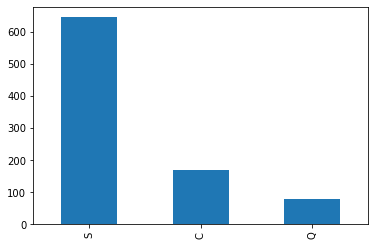

In [167]:
model=SimpleImputer(strategy='most_frequent')
data.loc[:,"Embarked"]=model.fit_transform(Embarked)
data.Embarked.value_counts().plot(kind='bar')

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [169]:
cover_columns=['Sex','Embarked']
dumms1=pd.get_dummies(data[cover_columns])

In [170]:
newdata=pd.concat([data,dumms1],axis=1)
newdata

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  28.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  Sex_female  Sex_male  \
0        0         A/5 21171   7.2500   NaN        S           0         1   
1        0          PC 17599  71.2833   C85        C           1         0   
2        0  STON/O2. 3101282   7.9250   NaN        S           1         0   
3        0            113803  53.1000  C123        S           1         0   
4        0            373450   8.0500   NaN        S           0         1   
..     ...               ...      ...   ...      ...         ...       ...   
886      0            211536  13.0000   NaN        S           0         1   
887      0            112053  30.0000   B42        S           1         0   
888      2        W./C. 6607  23.4500   NaN        S           1         0   
889      0            111369  30.0000  C148        C           0         1   
890      0            370376   7.7500   NaN        Q           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
0             0           0           1  
1             1           0           0  
2             0           0           1  
3             0           0           1  
4             0           0           1  
..          ...         ...         ...  
886           0           0           1  
887           0           0           1  
888           0           0           1  
889           1           0           0  
890           0           1           0  

[891 rows x 17 columns]

In [171]:
newdata=newdata.drop(["Sex","Embarked"],axis=1)

In [172]:

newdata

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name   Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris  22.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                             Allen, Mr. William Henry  35.0      0      0   
..                                                 ...   ...    ...    ...   
886                              Montvila, Rev. Juozas  27.0      0      0   
887                       Graham, Miss. Margaret Edith  19.0      0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  28.0      1      2   
889                              Behr, Mr. Karl Howell  26.0      0      0   
890                                Dooley, Mr. Patrick  32.0      0      0   

               Ticket     Fare Cabin  Sex_female  Sex_male  Embarked_C  \
0           A/5 21171   7.2500   NaN           0         1           0   
1            PC 17599  71.2833   C85           1         0           1   
2    STON/O2. 3101282   7.9250   NaN           1         0           0   
3              113803  53.1000  C123           1         0           0   
4              373450   8.0500   NaN           0         1           0   
..                ...      ...   ...         ...       ...         ...   
886            211536  13.0000   NaN           0         1           0   
887            112053  30.0000   B42           1         0           0   
888        W./C. 6607  23.4500   NaN           1         0           0   
889            111369  30.0000  C148           0         1           1   
890            370376   7.7500   NaN           0         1           0   

     Embarked_Q  Embarked_S  
0             0           1  
1             0           0  
2             0           1  
3             0           1  
4             0           1  
..          ...         ...  
886           0           1  
887           0           1  
888           0           1  
889           0           0  
890           1           0  

[891 rows x 15 columns]

In [175]:
from sklearn.preprocessing import KBinsDiscretizer
x=data.loc[:,"Age"].values.reshape(-1,1)

In [176]:
est=KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform')
est.fit_transform(x)

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],